# Battle of Neighborhoods: Where to Live in Calgary?
### By: Juan Sebastian Gomez Ramirez

## 1. Description of the Problem and Discussion of the Background

## Week 1: Introduction Section

##### I chose to work on a rather personal question that I've been asking myself during the past few months. Therefore, you will find this introduction section somewhat less-technical than the rest of the sections in this project. I immigrated to Canada 4 years ago, in 2015. I did my Masters at the University of Alberta, located in Edmonton. I did it in Geotechnical Engineering, specialized in Reservoir Geomechanics. 

##### I love Edmonton, is a city full of parks, outdoors activities, festivals, and awesome landscapes. Nonetheless, the majority of the Oil & Gas Companies have their headquarters down in Calgary, and they are my main target when I am searching for a suitable job position. This is the main reason I find necessary to move to that city. 

##### During the course of this final project, I will be Scraping some information from the different Calgary's neighborhoods. Classifying them in accordance with my personal needs and taste and finding a proper place to move, in case is needed for a future job position.

## 1. Description of the Data and Problem Solving Methodology

### DATA SET: CALGARY NEIGHBORHOODS

##### Obtained from the URL: https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Calgary
##### The Data Base chosen for this project contains the following information from the different neighborhoods in Calgary: Ward, Sector, Type of Neighborhood (Residential, Park, Industrial, Residual Area), Population (@2012), Population Density, and Area in km2.

##### Additional to the statistical information obtained from Wikipedia, Geographical coordinates (including Latitude and Longitude) from each neighborhood will be added to the Data-Frame, this with the main purpose of serving as valuable information for pulling Venues out of each neighborhood and analyzing the overall profile of each neighborhood.

### PROBLEM SOLVING METHODOLOGY

##### 1. Scrape the Neighborhoods information from Wikipedia Data base
##### 2. Build an appropiate Data-Frame with the information
##### 3. Obtain the Geographical Coordinates Information from each Neighborhood
##### 4. Use Foursquare to explore the Venues and build a profile of each Neighborhood
##### 5. Filter the Neighborhoods based on their profile
##### 6. Build graphical representations to facilitate the User Data Analysis and Results Presentation
##### 7. Analysis of Results and Discussion
##### 8. Conclusions form the Study

### TARGET AUDIENCE

##### 1. Fellow immigrants thinking on moving to Calgary. This analysis will provide basic but useful information regarding the profile of each Neighborhood in Calgary and might help them to choose the most suitable place for living.
##### 2. Fellow starter Data Scientists, which can find interesting the scope and understandable approach taken during the course of this project, would use it as learning platform and/or consulting data base.


## Week 2: Coding Section
### DATA PREPARATION: SCRAPING AND DATA-FRAME CONDITIONING

In [1]:
# Import the Neccesary Libraries and Complements

import pandas as pd
!pip install lxml
!pip install html5lib

In [2]:
# Wikipedia URL that Contains the Information
URL = 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Calgary'
Table = pd.read_html(URL)

In [3]:
# Scrape the information Table from Wikipedia and read it into a DataFrame
calgary = Table[0]
calgary.head()

,Name[9],Quadrant,Sector[10],Ward[11],Type[10],2012 PopulationRank,Population(2012)[9],Population(2011)[9],% change,Dwellings(2012)[9],Area(km2)[10],Populationdensity
0,Abbeydale,NE/SE,Northeast,10,Residential,82,5917.0,5700.0,3.8,2023.0,1.7,3480.6
1,Acadia,SE,South,9,Residential,27,10705.0,10615.0,0.8,5053.0,3.9,2744.9
2,Albert Park/Radisson Heights,SE,East,10,Residential,75,6234.0,6217.0,0.3,2709.0,2.5,2493.6
3,Altadore,SW,Centre,11,Residential,39,9116.0,8907.0,2.3,4486.0,2.9,3143.4
4,Alyth/Bonnybrook,SE,Centre,9,Industrial,208,16.0,17.0,−5.9,14.0,3.8,4.2


In [4]:
# Drop Unnecesary Columns from the Calgary Neighborhoods DataFrame

df_neigh = calgary.drop(['Quadrant', '2012 PopulationRank', 'Population(2011)[9]', '% change', 'Dwellings(2012)[9]'], axis=1)
df_neigh.head()

,Name[9],Sector[10],Ward[11],Type[10],Population(2012)[9],Area(km2)[10],Populationdensity
0,Abbeydale,Northeast,10,Residential,5917.0,1.7,3480.6
1,Acadia,South,9,Residential,10705.0,3.9,2744.9
2,Albert Park/Radisson Heights,East,10,Residential,6234.0,2.5,2493.6
3,Altadore,Centre,11,Residential,9116.0,2.9,3143.4
4,Alyth/Bonnybrook,Centre,9,Industrial,16.0,3.8,4.2


In [5]:
#Rename the Columns for more Clarity
df_calgary = df_neigh.rename(columns={"Name[9]": "Neighborhood", "Sector[10]": "Sector", 'Ward[11]': 'Ward',  'Type[10]': 'Type', 'Population(2012)[9]':'Population', 'Area(km2)[10]':'Area (km2)', 'Populationdensity':'Population Density' })
df_calgary.head()

,Neighborhood,Sector,Ward,Type,Population,Area (km2),Population Density
0,Abbeydale,Northeast,10,Residential,5917.0,1.7,3480.6
1,Acadia,South,9,Residential,10705.0,3.9,2744.9
2,Albert Park/Radisson Heights,East,10,Residential,6234.0,2.5,2493.6
3,Altadore,Centre,11,Residential,9116.0,2.9,3143.4
4,Alyth/Bonnybrook,Centre,9,Industrial,16.0,3.8,4.2


In [6]:
# Clean up DataFrame and leave only information pertaining Residential Neighborhoods

index = df_calgary[df_calgary['Type']=='Industrial'].index
df_calgary.drop(index, inplace=True)
index = df_calgary[df_calgary['Type']=='Major Park'].index
df_calgary.drop(index, inplace=True)
index = df_calgary[df_calgary['Type']=='Residual Area'].index
df_calgary.drop(index, inplace=True)
index = df_calgary[df_calgary['Type']=='Total City of Calgary'].index
df_calgary.drop(index, inplace=True)
df_calgary = df_calgary.reset_index(drop=True)
df_calgary.head(10)

,Neighborhood,Sector,Ward,Type,Population,Area (km2),Population Density
0,Abbeydale,Northeast,10,Residential,5917.0,1.7,3480.6
1,Acadia,South,9,Residential,10705.0,3.9,2744.9
2,Albert Park/Radisson Heights,East,10,Residential,6234.0,2.5,2493.6
3,Altadore,Centre,11,Residential,9116.0,2.9,3143.4
4,Applewood Park,East,10,Residential,6498.0,1.6,4061.3
5,Arbour Lake,Northwest,2,Residential,10836.0,4.4,2462.7
6,Aspen Woods,West,6,Residential,5271.0,3.8,1387.1
7,Auburn Bay,Southeast,12,Residential,7193.0,4.5,1598.4
8,Banff Trail,Centre,7,Residential,3837.0,1.5,2558
9,Bankview,Centre,8,Residential,5221.0,0.7,7458.6


In [7]:
# Find out the Number of Residential Neighborhoods (7 Characteristics from each one of them)
df_calgary.shape

(197, 7)

In [8]:
# Get the Geographic Coordinates from Calgary's Neighborhoods
# Data was extracted from Geopy Database and manipulated to convert it into a .xlsx File, due to Import Issues
# Coordinates DF is a .xlsx File that contains Latitude/Longitude data from all the Neighborhoods in df_calgary

coordinates = pd.read_excel ('PythonExport.xlsx', sheet_name = 'Sheet1')
coordinates.head()

,Neighborhood,Latitude,Longitude
0,Abbeydale,51.058836,-113.929413
1,Acadia,51.102527,-110.213738
2,Albert Park/Radisson Heights,51.044845,-113.990195
3,Altadore,51.015104,-114.100756
4,Applewood Park,51.044658,-113.928931


In [9]:
# Merge the DataFrames df_calgary (Neighborhoods Information) with coordinates (Geographic Information)

Calgary = pd.merge(df_calgary, coordinates, on="Neighborhood")
Calgary.head(10)

,Neighborhood,Sector,Ward,Type,Population,Area (km2),Population Density,Latitude,Longitude
0,Abbeydale,Northeast,10,Residential,5917.0,1.7,3480.6,51.058836,-113.929413
1,Acadia,South,9,Residential,10705.0,3.9,2744.9,51.102527,-110.213738
2,Albert Park/Radisson Heights,East,10,Residential,6234.0,2.5,2493.6,51.044845,-113.990195
3,Altadore,Centre,11,Residential,9116.0,2.9,3143.4,51.015104,-114.100756
4,Applewood Park,East,10,Residential,6498.0,1.6,4061.3,51.044658,-113.928931
5,Arbour Lake,Northwest,2,Residential,10836.0,4.4,2462.7,51.136786,-114.202355
6,Aspen Woods,West,6,Residential,5271.0,3.8,1387.1,51.043119,-114.210185
7,Auburn Bay,Southeast,12,Residential,7193.0,4.5,1598.4,50.890605,-113.959565
8,Banff Trail,Centre,7,Residential,3837.0,1.5,2558,51.071462,-114.111647
9,Bankview,Centre,8,Residential,5221.0,0.7,7458.6,51.033887,-114.099518


### DATA ANALYSIS: MAPPING CALGARY NEIGHBORHOODS AND START BUILDING THEIR PROFILE USING FOURSQUARE

In [10]:
# Import Additional Analysis Libraries and Complements

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge

The following packages will be UPDATED:

    certifi: 2019.6.16-py36_1  anaconda --> 2019.6.16-py36_1  conda-forge

The following packages will be DOWNGRADED:

    openssl: 1.0.2s-h7b6447c_0 anaconda --> 1.0.2r-h14c3975_0 conda-forge


certifi-2019.6.16    | 149 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Libraries imported.


In [11]:
address = 'Calgary'
geolocator = Nominatim(user_agent="Calgary_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Calgary are {}, {}.'.format(latitude, longitude))

# create map of Toronto using latitude and longitude values
map_calgary = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(Calgary['Latitude'], Calgary['Longitude'], Calgary['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_calgary)  
    
map_calgary

The geograpical coordinates of Calgary are 51.02532675, -114.049868485806.


In [12]:
# Foursquare Credentials and Version

CLIENT_ID = '2KH2YYS0EKOOQL2XHOM4X0UMKFKPJ0LNB3WM21HW1M2BOSTX' # your Foursquare ID
CLIENT_SECRET = '1V53MSBSRLETWJX0FOFZECTBCA2Z12AE2CZ0FDDWTNIN0NQR' # your Foursquare Secret
VERSION = '20190809' # Foursquare API version

In [13]:
# Run a function to Obtain the Main Venues within a radius of 1000 m from each Neighbrhood in Calgary

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        LIMIT = 100 # limit of number of venues returned by Foursquare API  
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
# Store the Venues from each Neighborhood in Calgary into a Separated Data-Frame:

calgary_venues = getNearbyVenues(names= Calgary['Neighborhood'],
                                   latitudes= Calgary['Latitude'],
                                   longitudes= Calgary['Longitude']
                                  )

In [52]:
# Get an Idea of the Different Venues around 1000 m in every Neighborhood in Calgary

print(calgary_venues.shape)
calgary_venues.head()

(4138, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbeydale,51.058836,-113.929413,Subway,51.059215,-113.934836,Sandwich Place
1,Abbeydale,51.058836,-113.929413,Mac's,51.059376,-113.934425,Convenience Store
2,Abbeydale,51.058836,-113.929413,Cave to Castle Property Inspection Inc,51.054379,-113.932812,Home Service
3,Abbeydale,51.058836,-113.929413,Barrio Fiesta,51.052695,-113.935544,Filipino Restaurant
4,Abbeydale,51.058836,-113.929413,Mely's Bakery and Café,51.052672,-113.936031,Café


In [16]:
#Get an Idea of the Different Types of Venues around every Neighborhood in Calgary

print('There are {} unique categories.'.format(len(calgary_venues['Venue Category'].unique())))

There are 266 unique categories.


In [17]:
# Analyze each Neighborhood in Calgary, AB
# One hot encoding
calgary_onehot = pd.get_dummies(calgary_venues[['Venue Category']], prefix="", prefix_sep="")

# Add neighborhood column back to dataframe
calgary_onehot['Neighborhood'] = calgary_venues['Neighborhood'] 

calgary_onehot.head()

,ATM,Accessories Store,African Restaurant,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beer Garden,Belgian Restaurant,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Bus Line,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Casino,Chinese Restaurant,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Classroom,College Gym,College Residence Hall,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Hockey Rink,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Inn,Insurance Office,Intersection,Irish Pub,Island,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Poutine Place,Print Shop,Professional & Other Places,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Travel & Transport,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [18]:
# Next, let's group rows by neighborhood 
# and by taking the mean of the frequency of occurrence of each category

calgary_grouped = calgary_onehot.groupby('Neighborhood').mean().reset_index()
calgary_grouped

,Neighborhood,ATM,Accessories Store,African Restaurant,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beer Garden,Belgian Restaurant,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Bus Line,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Casino,Chinese Restaurant,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Classroom,College Gym,College Residence Hall,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Forest,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Field,Hockey Rink,Home Service,Hong Kong Restaurant,Hookah Bar,Hostel,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Inn,Insurance Office,Intersection,Irish Pub,Island,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoors & Recreation,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pier,Pizza Place,Playground,Plaza,Poke Place,Pool,Poutine Place,Print Shop,Professional & Other Places,Pub,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,River,Road,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Ski Area,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stables,Stadium,Steakhouse,Student Center,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Trail,Train Station,Travel & Transport,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Abbeydale,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [19]:
# Calgary 5 Top Venues by each Neighborhood:

num_top_venues = 5

for hood in calgary_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = calgary_grouped[calgary_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbeydale----
                 venue  freq
0       Sandwich Place   0.2
1    Convenience Store   0.2
2         Home Service   0.2
3                 Café   0.2
4  Filipino Restaurant   0.2


----Albert Park/Radisson Heights----
               venue  freq
0        Pizza Place  0.11
1      Grocery Store  0.07
2   Asian Restaurant  0.07
3     Sandwich Place  0.07
4  Indian Restaurant  0.04


----Altadore----
            venue  freq
0         Dog Run  0.23
1            Park  0.15
2  Ice Cream Shop  0.08
3     Coffee Shop  0.08
4     Hockey Rink  0.08


----Applewood Park----
                           venue  freq
0                Warehouse Store  0.25
1                   Liquor Store  0.25
2                    Coffee Shop  0.25
3                           Park  0.25
4  Paper / Office Supplies Store  0.00


----Arbour Lake----
                                      venue  freq
0  Residential Building (Apartment / Condo)   0.1
1                     Vietnamese Restaurant   0.1
2            

### VISUALIZATION OF THE VENUES IN EACH NEIGHBORHOOD: PROFILE BUILDING

In [20]:
#To Facilitate the visualization of the main Venues per Neighborhood in Calgary,
# Let's write Previous information into a Pandas DataFrame

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = calgary_grouped['Neighborhood']

for ind in np.arange(calgary_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(calgary_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbeydale,Café,Filipino Restaurant,Convenience Store,Sandwich Place,Home Service,Zoo Exhibit,Flower Shop,Food,Food & Drink Shop,Food Court
1,Albert Park/Radisson Heights,Pizza Place,Grocery Store,Sandwich Place,Asian Restaurant,Ethiopian Restaurant,Smoke Shop,Gourmet Shop,Fast Food Restaurant,Swiss Restaurant,Bar
2,Altadore,Dog Run,Park,Greek Restaurant,Bar,Coffee Shop,Massage Studio,Hockey Rink,Pub,Ice Cream Shop,Liquor Store
3,Applewood Park,Park,Liquor Store,Coffee Shop,Warehouse Store,Food Court,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck
4,Arbour Lake,Spa,Furniture / Home Store,Yoga Studio,Bookstore,Convenience Store,Steakhouse,Vietnamese Restaurant,Bank,Residential Building (Apartment / Condo),Coffee Shop
5,Aspen Woods,Coffee Shop,Asian Restaurant,Cupcake Shop,Mexican Restaurant,Boutique,Food & Drink Shop,Grocery Store,Tea Room,Bank,Salon / Barbershop
6,Auburn Bay,Construction & Landscaping,Breakfast Spot,Water Park,Health & Beauty Service,Frozen Yogurt Shop,Fried Chicken Joint,Furniture / Home Store,French Restaurant,Garden,Fast Food Restaurant
7,Banff Trail,Hotel,Fast Food Restaurant,Park,Liquor Store,Coffee Shop,Pizza Place,Breakfast Spot,Café,Candy Store,Sandwich Place
8,Bankview,Coffee Shop,Vietnamese Restaurant,Pub,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Sandwich Place,Convenience Store,Indian Restaurant,Park
9,Bayview,Pub,Grocery Store,Park,Other Great Outdoors,Breakfast Spot,French Restaurant,Forest,Football Stadium,Food Truck,Fast Food Restaurant


In [21]:
#Merge the inital Calgary Dataframe with Sorted Most Visited places for each Neighborhood

Calgary_merged = Calgary.join (neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Calgary_merged.head(10)

,Neighborhood,Sector,Ward,Type,Population,Area (km2),Population Density,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbeydale,Northeast,10,Residential,5917.0,1.7,3480.6,51.058836,-113.929413,Café,Filipino Restaurant,Convenience Store,Sandwich Place,Home Service,Zoo Exhibit,Flower Shop,Food,Food & Drink Shop,Food Court
1,Acadia,South,9,Residential,10705.0,3.9,2744.9,51.102527,-110.213738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albert Park/Radisson Heights,East,10,Residential,6234.0,2.5,2493.6,51.044845,-113.990195,Pizza Place,Grocery Store,Sandwich Place,Asian Restaurant,Ethiopian Restaurant,Smoke Shop,Gourmet Shop,Fast Food Restaurant,Swiss Restaurant,Bar
3,Altadore,Centre,11,Residential,9116.0,2.9,3143.4,51.015104,-114.100756,Dog Run,Park,Greek Restaurant,Bar,Coffee Shop,Massage Studio,Hockey Rink,Pub,Ice Cream Shop,Liquor Store
4,Applewood Park,East,10,Residential,6498.0,1.6,4061.3,51.044658,-113.928931,Park,Liquor Store,Coffee Shop,Warehouse Store,Food Court,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck
5,Arbour Lake,Northwest,2,Residential,10836.0,4.4,2462.7,51.136786,-114.202355,Spa,Furniture / Home Store,Yoga Studio,Bookstore,Convenience Store,Steakhouse,Vietnamese Restaurant,Bank,Residential Building (Apartment / Condo),Coffee Shop
6,Aspen Woods,West,6,Residential,5271.0,3.8,1387.1,51.043119,-114.210185,Coffee Shop,Asian Restaurant,Cupcake Shop,Mexican Restaurant,Boutique,Food & Drink Shop,Grocery Store,Tea Room,Bank,Salon / Barbershop
7,Auburn Bay,Southeast,12,Residential,7193.0,4.5,1598.4,50.890605,-113.959565,Construction & Landscaping,Breakfast Spot,Water Park,Health & Beauty Service,Frozen Yogurt Shop,Fried Chicken Joint,Furniture / Home Store,French Restaurant,Garden,Fast Food Restaurant
8,Banff Trail,Centre,7,Residential,3837.0,1.5,2558,51.071462,-114.111647,Hotel,Fast Food Restaurant,Park,Liquor Store,Coffee Shop,Pizza Place,Breakfast Spot,Café,Candy Store,Sandwich Place
9,Bankview,Centre,8,Residential,5221.0,0.7,7458.6,51.033887,-114.099518,Coffee Shop,Vietnamese Restaurant,Pub,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Sandwich Place,Convenience Store,Indian Restaurant,Park


In [22]:
# Let's get rid of the Neighborhoods where Foursquare did not find any Venues within the Investigation radius

Calgary_clear = Calgary_merged.dropna(subset=['Population', '1st Most Common Venue'])
Calgary_clear

,Neighborhood,Sector,Ward,Type,Population,Area (km2),Population Density,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbeydale,Northeast,10,Residential,5917.0,1.7,3480.6,51.058836,-113.929413,Café,Filipino Restaurant,Convenience Store,Sandwich Place,Home Service,Zoo Exhibit,Flower Shop,Food,Food & Drink Shop,Food Court
2,Albert Park/Radisson Heights,East,10,Residential,6234.0,2.5,2493.6,51.044845,-113.990195,Pizza Place,Grocery Store,Sandwich Place,Asian Restaurant,Ethiopian Restaurant,Smoke Shop,Gourmet Shop,Fast Food Restaurant,Swiss Restaurant,Bar
3,Altadore,Centre,11,Residential,9116.0,2.9,3143.4,51.015104,-114.100756,Dog Run,Park,Greek Restaurant,Bar,Coffee Shop,Massage Studio,Hockey Rink,Pub,Ice Cream Shop,Liquor Store
4,Applewood Park,East,10,Residential,6498.0,1.6,4061.3,51.044658,-113.928931,Park,Liquor Store,Coffee Shop,Warehouse Store,Food Court,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck
5,Arbour Lake,Northwest,2,Residential,10836.0,4.4,2462.7,51.136786,-114.202355,Spa,Furniture / Home Store,Yoga Studio,Bookstore,Convenience Store,Steakhouse,Vietnamese Restaurant,Bank,Residential Building (Apartment / Condo),Coffee Shop
6,Aspen Woods,West,6,Residential,5271.0,3.8,1387.1,51.043119,-114.210185,Coffee Shop,Asian Restaurant,Cupcake Shop,Mexican Restaurant,Boutique,Food & Drink Shop,Grocery Store,Tea Room,Bank,Salon / Barbershop
7,Auburn Bay,Southeast,12,Residential,7193.0,4.5,1598.4,50.890605,-113.959565,Construction & Landscaping,Breakfast Spot,Water Park,Health & Beauty Service,Frozen Yogurt Shop,Fried Chicken Joint,Furniture / Home Store,French Restaurant,Garden,Fast Food Restaurant
8,Banff Trail,Centre,7,Residential,3837.0,1.5,2558,51.071462,-114.111647,Hotel,Fast Food Restaurant,Park,Liquor Store,Coffee Shop,Pizza Place,Breakfast Spot,Café,Candy Store,Sandwich Place
9,Bankview,Centre,8,Residential,5221.0,0.7,7458.6,51.033887,-114.099518,Coffee Shop,Vietnamese Restaurant,Pub,Fast Food Restaurant,Pizza Place,Mexican Restaurant,Sandwich Place,Convenience Store,Indian Restaurant,Park
10,Bayview,South,11,Residential,682.0,0.4,1705,50.975278,-114.114444,Pub,Grocery Store,Park,Other Great Outdoors,Breakfast Spot,French Restaurant,Forest,Football Stadium,Food Truck,Fast Food Restaurant


### GET AN OVERALL IDEA OF THE MOST POPULAR TYPE OF VENUES IN CALGARY 

#### This Information will be useful to start filtering the different Neighborhoods based on the personal interest 

In [23]:
# We have seen that there are 266 unique categories in the Venues Data-Frame in Calgary. 
# Let's see the Frequency of Each Category

print (calgary_venues['Venue Category'].value_counts())

Coffee Shop                                 302
Fast Food Restaurant                        155
Pub                                         152
Grocery Store                               150
Pizza Place                                 148
Sandwich Place                              115
Convenience Store                           108
Liquor Store                                100
Vietnamese Restaurant                        99
Park                                         99
Pharmacy                                     94
Restaurant                                   93
Chinese Restaurant                           71
Bar                                          69
Café                                         62
Italian Restaurant                           61
Breakfast Spot                               60
Hotel                                        59
Bakery                                       58
American Restaurant                          58
Sushi Restaurant                        

In [24]:
# Now, let's create a dataframe of top 10 categories
Calgary_Venues_Top10 = calgary_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Calgary_Venues_Top10.reset_index()
Calgary_Venues_Top10.rename(index=str, columns={" ": "Venue Category", "frequency": "Frequency"}, inplace=True)

Calgary_Venues_Top10

,Frequency
Coffee Shop,302
Fast Food Restaurant,155
Pub,152
Grocery Store,150
Pizza Place,148
Sandwich Place,115
Convenience Store,108
Liquor Store,100
Vietnamese Restaurant,99
Park,99


### FILTER THE NEIGHBORHOODS BASED ON THE INTERESTS:
#### Let's filter the Neighborhoods in Accordance with the Interest of a young couple with an Active Dog
#### Interest 1: Grocery Store nearby
#### Interest 2: Fast Food Restaurant nearby
#### Interest 3: Park nearby

In [25]:
# Let's filter the Neighborhoods in Accordance with the Interest of a young couple with an Active Dog
# Interest 1: Grocery Store nearby
# Interest 2: Fast Food Restaurant nearby
# Interest 3: Park nearby

In [26]:
# Interest 1: Grocery Store nearby
Calgary_fav = Calgary_merged.loc[(Calgary_merged['1st Most Common Venue'] == 'Fast Food Restaurant') | (Calgary_merged['1st Most Common Venue'] == 'Grocery Store') | (Calgary_merged['1st Most Common Venue'] == 'Park')]
print(Calgary_fav.shape)
Calgary_fav

(40, 19)


,Neighborhood,Sector,Ward,Type,Population,Area (km2),Population Density,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Applewood Park,East,10,Residential,6498.0,1.6,4061.3,51.044658,-113.928931,Park,Liquor Store,Coffee Shop,Warehouse Store,Food Court,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck
17,Brentwood,Northwest,7,Residential,6059.0,2.9,2089.3,51.098611,-114.134444,Fast Food Restaurant,Coffee Shop,Sandwich Place,Pub,Asian Restaurant,Burger Joint,Breakfast Spot,Big Box Store,Sushi Restaurant,Grocery Store
20,Britannia,Centre,11,Residential,803.0,0.5,1606,51.012540,-114.083447,Park,Dog Run,Food & Drink Shop,Kitchen Supply Store,Ice Cream Shop,Coffee Shop,Restaurant,Shopping Mall,Golf Course,Fast Food Restaurant
24,Castleridge,Northeast,5,Residential,6096.0,1.2,5080,51.105977,-113.959820,Fast Food Restaurant,Grocery Store,Indian Restaurant,Convenience Store,Coffee Shop,Middle Eastern Restaurant,Liquor Store,Bank,Pizza Place,Pharmacy
32,Christie Park,West,6,Residential,2196.0,0.8,2745,51.038434,-114.176549,Grocery Store,Pub,Japanese Restaurant,Café,Chinese Restaurant,Gym / Fitness Center,Sandwich Place,Light Rail Station,Dry Cleaner,Eastern European Restaurant
40,Cougar Ridge,West,6,Residential,5874.0,2.2,2670,51.070710,-114.210968,Fast Food Restaurant,Dance Studio,Sushi Restaurant,Sports Bar,Coffee Shop,Ski Area,Health & Beauty Service,Football Stadium,Food Truck,Farmers Market
42,Country Hills Village,North,3,Residential,2615.0,1.0,2615,51.157500,-114.061525,Grocery Store,Fast Food Restaurant,Coffee Shop,Pizza Place,Gym,Pet Store,Sandwich Place,Bakery,Gym / Fitness Center,Liquor Store
43,Coventry Hills,North,3,Residential,15969.0,4.1,3894.9,51.163596,-114.056293,Grocery Store,Pet Store,Gym,Paper / Office Supplies Store,IT Services,Toy / Game Store,Smoothie Shop,Frozen Yogurt Shop,Medical Center,Chinese Restaurant
47,Dalhousie,Northwest,7,Residential,9085.0,3.3,2753,51.106849,-114.154095,Grocery Store,Bank,Fast Food Restaurant,Miscellaneous Shop,Gas Station,Café,Bookstore,Shopping Mall,Chinese Restaurant,Sushi Restaurant
48,Deer Ridge,South,14,Residential,4084.0,1.4,2917.1,50.927276,-114.019418,Fast Food Restaurant,Pub,Coffee Shop,Grocery Store,Smoothie Shop,Market,Shabu-Shabu Restaurant,Spa,Bank,Big Box Store


In [27]:
# Sort the resultant Neighborhoods by the Most Populated ones:

Calgary_Fav = Calgary_fav.sort_values(['Population Density'])
Calgary_Fav = Calgary_Fav[Calgary_Fav.Population != 0]
Calgary_Fav

,Neighborhood,Sector,Ward,Type,Population,Area (km2),Population Density,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
162,Silverado,South,14,Residential,5136.0,5.1,1007.1,50.884366,-114.078035,Fast Food Restaurant,Liquor Store,Bar,Coffee Shop,Gym / Fitness Center,Asian Restaurant,Grocery Store,Cosmetics Shop,Forest,Football Stadium
159,Sherwood,North,2,Residential,2523.0,2.4,1051.3,51.161000,-114.153000,Fast Food Restaurant,Sporting Goods Shop,American Restaurant,Coffee Shop,Shoe Store,Furniture / Home Store,Sandwich Place,Thai Restaurant,Bank,Clothing Store
166,Southview,East,10,Residential,1900.0,1.6,1187.5,51.033892,-113.994697,Grocery Store,Vietnamese Restaurant,Fried Chicken Joint,Pharmacy,Bar,Bank,Golf Course,Sandwich Place,Ethiopian Restaurant,Asian Restaurant
168,Springbank Hill,West,6,Residential,8783.0,6.3,1394.1,51.028926,-114.209793,Grocery Store,Indian Restaurant,Spa,Coffee Shop,Zoo Exhibit,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court
192,Willow Park,South,14,Residential,5229.0,3.4,1537.9,50.960293,-114.054645,Grocery Store,Breakfast Spot,Business Service,Bar,Skating Rink,Convenience Store,Golf Course,Miscellaneous Shop,Accessories Store,Liquor Store
20,Britannia,Centre,11,Residential,803.0,0.5,1606,51.012540,-114.083447,Park,Dog Run,Food & Drink Shop,Kitchen Supply Store,Ice Cream Shop,Coffee Shop,Restaurant,Shopping Mall,Golf Course,Fast Food Restaurant
184,Varsity,Northwest,1,Residential,12200.0,6.8,1794.1,51.092222,-114.147500,Fast Food Restaurant,Coffee Shop,Department Store,Pharmacy,Pizza Place,American Restaurant,Restaurant,Pub,Chinese Restaurant,Breakfast Spot
60,Elbow Park,Centre,8/11,Residential,3377.0,1.8,1876.1,51.020634,-114.078447,Park,Athletics & Sports,River,Food Court,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck
17,Brentwood,Northwest,7,Residential,6059.0,2.9,2089.3,51.098611,-114.134444,Fast Food Restaurant,Coffee Shop,Sandwich Place,Pub,Asian Restaurant,Burger Joint,Breakfast Spot,Big Box Store,Sushi Restaurant,Grocery Store
120,Ogden,Southeast,9,Residential,8702.0,4.1,2122.4,50.967778,-114.129444,Grocery Store,Pub,Construction & Landscaping,Other Great Outdoors,Park,Fast Food Restaurant,Hockey Arena,Liquor Store,Shopping Mall,Pizza Place


### FINAL DATA-FRAME CONTAINING LESS-DENSELY POPULATED NEIGHBORHOODS IN CALGARY THAT HAVE EITHER A GROCERY STORE/ FAST FOOD RESTAURANT/ PARK WITHIN THEIR MOST COMMON VENUES (LIMIT: 1000 m)

In [28]:
# Finally, Let's filter the first 15 Neighborhoods that are within the standards and save them into a separate DF

Calgary_Top15 = Calgary_Fav.head(15)
Calgary_Top15

,Neighborhood,Sector,Ward,Type,Population,Area (km2),Population Density,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
162,Silverado,South,14,Residential,5136.0,5.1,1007.1,50.884366,-114.078035,Fast Food Restaurant,Liquor Store,Bar,Coffee Shop,Gym / Fitness Center,Asian Restaurant,Grocery Store,Cosmetics Shop,Forest,Football Stadium
159,Sherwood,North,2,Residential,2523.0,2.4,1051.3,51.161000,-114.153000,Fast Food Restaurant,Sporting Goods Shop,American Restaurant,Coffee Shop,Shoe Store,Furniture / Home Store,Sandwich Place,Thai Restaurant,Bank,Clothing Store
166,Southview,East,10,Residential,1900.0,1.6,1187.5,51.033892,-113.994697,Grocery Store,Vietnamese Restaurant,Fried Chicken Joint,Pharmacy,Bar,Bank,Golf Course,Sandwich Place,Ethiopian Restaurant,Asian Restaurant
168,Springbank Hill,West,6,Residential,8783.0,6.3,1394.1,51.028926,-114.209793,Grocery Store,Indian Restaurant,Spa,Coffee Shop,Zoo Exhibit,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court
192,Willow Park,South,14,Residential,5229.0,3.4,1537.9,50.960293,-114.054645,Grocery Store,Breakfast Spot,Business Service,Bar,Skating Rink,Convenience Store,Golf Course,Miscellaneous Shop,Accessories Store,Liquor Store
20,Britannia,Centre,11,Residential,803.0,0.5,1606,51.012540,-114.083447,Park,Dog Run,Food & Drink Shop,Kitchen Supply Store,Ice Cream Shop,Coffee Shop,Restaurant,Shopping Mall,Golf Course,Fast Food Restaurant
184,Varsity,Northwest,1,Residential,12200.0,6.8,1794.1,51.092222,-114.147500,Fast Food Restaurant,Coffee Shop,Department Store,Pharmacy,Pizza Place,American Restaurant,Restaurant,Pub,Chinese Restaurant,Breakfast Spot
60,Elbow Park,Centre,8/11,Residential,3377.0,1.8,1876.1,51.020634,-114.078447,Park,Athletics & Sports,River,Food Court,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck
17,Brentwood,Northwest,7,Residential,6059.0,2.9,2089.3,51.098611,-114.134444,Fast Food Restaurant,Coffee Shop,Sandwich Place,Pub,Asian Restaurant,Burger Joint,Breakfast Spot,Big Box Store,Sushi Restaurant,Grocery Store
120,Ogden,Southeast,9,Residential,8702.0,4.1,2122.4,50.967778,-114.129444,Grocery Store,Pub,Construction & Landscaping,Other Great Outdoors,Park,Fast Food Restaurant,Hockey Arena,Liquor Store,Shopping Mall,Pizza Place


#### Improved Visualization: Less-Densely Populated Neighborhoods:
#### Silverado (South Side), Sherwood (North Side), and Southview (East Side)

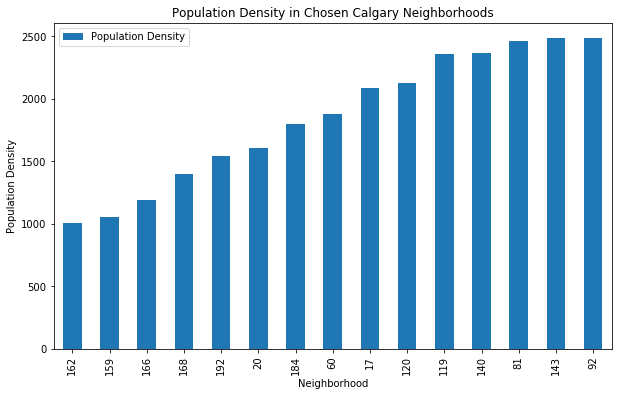

In [53]:
# Let's Visualize the Top 15 Neighborhood's Population Density

import matplotlib as mpl
import matplotlib.pyplot as plt

df_population = Calgary_Top15[['Neighborhood', 'Population Density']].copy()
df_population.head()
df_population[['Population Density']] = df_population[['Population Density']].astype(float)

df_population.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Population Density') # add y-label to the plot
plt.title('Population Density in Chosen Calgary Neighborhoods') # add title to the plot

plt.show()

In [30]:
#Fix the Final DataFrame to be able to Cluster the Information of the Top Neighborhoods

Calgary_TopFinal = Calgary_Top15.drop(['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue', '5th Most Common Venue', '6th Most Common Venue', '7th Most Common Venue', '8th Most Common Venue', '9th Most Common Venue', '10th Most Common Venue'], axis=1)
Calgary_TopFinal.head()

,Neighborhood,Sector,Ward,Type,Population,Area (km2),Population Density,Latitude,Longitude
162,Silverado,South,14,Residential,5136.0,5.1,1007.1,50.884366,-114.078035
159,Sherwood,North,2,Residential,2523.0,2.4,1051.3,51.161000,-114.153000
166,Southview,East,10,Residential,1900.0,1.6,1187.5,51.033892,-113.994697
168,Springbank Hill,West,6,Residential,8783.0,6.3,1394.1,51.028926,-114.209793
192,Willow Park,South,14,Residential,5229.0,3.4,1537.9,50.960293,-114.054645


### CALGARY NEIGHBORHOOD CLUSTERING: VENUES SIMILARITIES
#### This Visualization Tool will improve the insights on the previous Clustering Analysis. Neighborhoods represented with same-color marking will have similarities in their Venues

In [46]:
#Start Calgary Top Neighborhoods Clustering Process
# Set number of clusters
kclusters = 3

Calgary_grouped_clustering = calgary_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Calgary_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:15]

# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Calgary_merged = Calgary_TopFinal

# merge Calgary_grouped with Calgary_data to add latitude/longitude for each neighborhood
Calgary_merged = Calgary_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Calgary_merged.head(15) # check the last columns!

,Neighborhood,Sector,Ward,Type,Population,Area (km2),Population Density,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
162,Silverado,South,14,Residential,5136.0,5.1,1007.1,50.884366,-114.078035,0,Fast Food Restaurant,Liquor Store,Bar,Coffee Shop,Gym / Fitness Center,Asian Restaurant,Grocery Store,Cosmetics Shop,Forest,Football Stadium
159,Sherwood,North,2,Residential,2523.0,2.4,1051.3,51.161000,-114.153000,0,Fast Food Restaurant,Sporting Goods Shop,American Restaurant,Coffee Shop,Shoe Store,Furniture / Home Store,Sandwich Place,Thai Restaurant,Bank,Clothing Store
166,Southview,East,10,Residential,1900.0,1.6,1187.5,51.033892,-113.994697,0,Grocery Store,Vietnamese Restaurant,Fried Chicken Joint,Pharmacy,Bar,Bank,Golf Course,Sandwich Place,Ethiopian Restaurant,Asian Restaurant
168,Springbank Hill,West,6,Residential,8783.0,6.3,1394.1,51.028926,-114.209793,0,Grocery Store,Indian Restaurant,Spa,Coffee Shop,Zoo Exhibit,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court
192,Willow Park,South,14,Residential,5229.0,3.4,1537.9,50.960293,-114.054645,0,Grocery Store,Breakfast Spot,Business Service,Bar,Skating Rink,Convenience Store,Golf Course,Miscellaneous Shop,Accessories Store,Liquor Store
20,Britannia,Centre,11,Residential,803.0,0.5,1606,51.012540,-114.083447,1,Park,Dog Run,Food & Drink Shop,Kitchen Supply Store,Ice Cream Shop,Coffee Shop,Restaurant,Shopping Mall,Golf Course,Fast Food Restaurant
184,Varsity,Northwest,1,Residential,12200.0,6.8,1794.1,51.092222,-114.147500,0,Fast Food Restaurant,Coffee Shop,Department Store,Pharmacy,Pizza Place,American Restaurant,Restaurant,Pub,Chinese Restaurant,Breakfast Spot
60,Elbow Park,Centre,8/11,Residential,3377.0,1.8,1876.1,51.020634,-114.078447,1,Park,Athletics & Sports,River,Food Court,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck
17,Brentwood,Northwest,7,Residential,6059.0,2.9,2089.3,51.098611,-114.134444,0,Fast Food Restaurant,Coffee Shop,Sandwich Place,Pub,Asian Restaurant,Burger Joint,Breakfast Spot,Big Box Store,Sushi Restaurant,Grocery Store
120,Ogden,Southeast,9,Residential,8702.0,4.1,2122.4,50.967778,-114.129444,0,Grocery Store,Pub,Construction & Landscaping,Other Great Outdoors,Park,Fast Food Restaurant,Hockey Arena,Liquor Store,Shopping Mall,Pizza Place


In [48]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Calgary_merged['Latitude'], Calgary_merged['Longitude'], Calgary_merged['Neighborhood'], Calgary_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## RESULTS SECTION

##### 1. The Neighborhoods in Calgary were filtered in accordance with their main type. For the purpose of this study, neither Industrial, Major Parks Zones or Residual Areas were taken into account. Only Residential Neighborhoods were analyzed for the overall profile of their main Venues.
##### 2. The Results obtained from this study indicate that either the Central or South sides of Calgary contain the majority of the Neighborhoods surrounded by Grocery Stores, Fast Food Restaurants or Parks; being these three types of venues the ones chosen by the author as main reasons to locate a proper place for living. These venue types can be easily changed to redirect the analysis and explore other results from the model.
##### 3. In general, even though the Central and South sides of Calgary are more suitable to be inhabited in accordance with their venues, North side Neighborhoods with similar characteristics are less-densely populated, which can be a determining factor when thinking about peacefulness of the neighborhood. Silverado was found to be an exception of this observation.
##### 4. It is more common to find a Neighborhood with surrounding Grocery Stores or Restaurants (in general) than parks. Therefore, If thinking about work out possibilities during summer, it would be more viable to choose a Neighborhood with acceptable profile and within a walking distance from a Major Park Zone.

## DISCUSSION AND RECOMMENDATIONS

##### According to this analysis, Central and Southern sides of Calgary will provide the most appropriate Neighborhoods to live in when prioritizing the presence of Grocery Stores, Restaurants and Parks around. In spit of that, Central and Southern sides of Calgary are within the most populated areas, so this will not represent that they are the most peaceful ones. North Side on the contrary, can be less populated and more quiet area.

##### However, this analysis does not demonstrate the full capability of this model. First, Different analysis can be made: variation of the required Neighborhood profile, variation of the desired population density. Second, it can be complemented with Calgary's crime data, which will give a sense of the safety standards of each Neighborhood. Third, it can be complemented with Calgary's km2 price data, which will give a more comprehensive sense of the suitability of buying a property on each Neighborhood.

## CONCLUSIONS

##### During the course of this project, users would be able to get a small glimpse of Data Science applied to solve a real problem. The power of Python libraries, combined with Foursquare API and Folium maps will allow data scientists and programmers to analyze infinite cases and solve almost any type of problem (if Data is available).
##### There are always special considerations, limitations and drawbacks, specially when it comes to Data Science's experience. This model is not intended to solve complex situations related to demographic behavior of Calgary's Neighborhoods, but it can become the first step on a more advanced project in this matter. I hope you've enjoyed it as much as I did. 